In [39]:
import pandas as pd 
import numpy as np
from datetime import datetime as dt
from collections import Counter

In [2]:
df = pd.read_csv("superstore.csv", encoding = "latin1", parse_dates = ["Order Date", "Ship Date"])

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
null_counts = df.isnull().sum()
null_counts

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [5]:
df.groupby("Region").count()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Region,,,,,,,,,,,,,,,,,,,,
Central,2323,2323,2323,2323,2323,2323,2323,2323,2323,2323,2323,2323,2323,2323,2323,2323,2323,2323,2323,2323
East,2848,2848,2848,2848,2848,2848,2848,2848,2848,2848,2848,2848,2848,2848,2848,2848,2848,2848,2848,2848
South,1620,1620,1620,1620,1620,1620,1620,1620,1620,1620,1620,1620,1620,1620,1620,1620,1620,1620,1620,1620
West,3203,3203,3203,3203,3203,3203,3203,3203,3203,3203,3203,3203,3203,3203,3203,3203,3203,3203,3203,3203


In [6]:
type(df["Ship Date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [7]:
df.groupby("State")

In [8]:
df.groupby("State").agg("sum").reset_index()

,State,Row ID,Postal Code,Sales,Quantity,Discount,Profit
0,Alabama,243876,2195669,19510.6400,256,0.00,5786.8253
1,Arizona,1019876,19102126,35282.0010,862,68.00,-3427.9246
2,Arkansas,304575,4339309,11678.1300,240,0.00,4008.6871
3,California,10137449,184382639,457687.6315,7667,145.60,76381.3871
4,Colorado,797002,14613828,32108.1180,693,57.60,-6527.8579
5,Connecticut,444411,531005,13384.3570,281,0.60,3511.4918
6,Delaware,504370,1896504,27451.0690,367,0.60,9977.3748
7,District of Columbia,17918,200160,2865.0200,40,0.00,1059.5893
8,Florida,1958255,12640225,89473.7080,1379,114.65,-3399.3017
9,Georgia,883590,5685480,49095.8400,705,0.00,16250.0433


In [9]:
df["Product Name"].value_counts()

Staple envelope                                                                        48
Staples                                                                                46
Easy-staple paper                                                                      46
Avery Non-Stick Binders                                                                20
Staples in misc. colors                                                                19
                                                                                       ..
Boston 1900 Electric Pencil Sharpener                                                   1
RCA ViSYS 25423RE1 Corded phone                                                         1
Canon Color ImageCLASS MF8580Cdw Wireless Laser All-In-One Printer, Copier, Scanner     1
Newell 342                                                                              1
Eldon Jumbo ProFile Portable File Boxes Graphite/Black                                  1
Name: Prod

In [10]:
len(df["Product Name"])

9994

In [11]:
df["City"].value_counts()

New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64

In [13]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [20]:
weekday_of_order_date = []

In [18]:
dt.weekday(df["Order Date"].tolist())

TypeError: descriptor 'weekday' for 'datetime.date' objects doesn't apply to a 'list' object

In [21]:
for i in df["Order Date"]:
    dt.weekday(i)
    
    
    
    #weekday_of_order_date.append(dt.weekday(i))

In [26]:
df["Order Date"].dt.day_name()

0        Tuesday
1        Tuesday
2         Sunday
3         Sunday
4         Sunday
          ...   
9989     Tuesday
9990      Sunday
9991      Sunday
9992      Sunday
9993    Thursday
Name: Order Date, Length: 9994, dtype: object

In [68]:
df["Order Day of Week"] = df["Order Date"].dt.day_name()

In [ ]:
df["Day of Order"] = 

In [66]:
type(df["Order Date"].dt.day_name()[0])

str

In [28]:
df["Ship Date"].dt.day_name()

0         Friday
1         Friday
2       Thursday
3         Sunday
4         Sunday
          ...   
9989    Thursday
9990      Friday
9991      Friday
9992      Friday
9993     Tuesday
Name: Ship Date, Length: 9994, dtype: object

In [69]:
df["Ship Day of Week"] = df["Ship Date"].dt.day_name()

In [35]:
time_ship = df["Ship Date"] - df["Order Date"]

In [36]:
time_ship

0      3 days
1      3 days
2      4 days
3      7 days
4      7 days
        ...  
9989   2 days
9990   5 days
9991   5 days
9992   5 days
9993   5 days
Length: 9994, dtype: timedelta64[ns]

In [38]:
time_ship.unique

<bound method Series.unique of 0      3 days
1      3 days
2      4 days
3      7 days
4      7 days
        ...  
9989   2 days
9990   5 days
9991   5 days
9992   5 days
9993   5 days
Length: 9994, dtype: timedelta64[ns]>

In [40]:
Counter(time_ship)

Counter({Timedelta('3 days 00:00:00'): 1005,
         Timedelta('4 days 00:00:00'): 2774,
         Timedelta('7 days 00:00:00'): 621,
         Timedelta('5 days 00:00:00'): 2169,
         Timedelta('2 days 00:00:00'): 1334,
         Timedelta('6 days 00:00:00'): 1203,
         Timedelta('1 days 00:00:00'): 369,
         Timedelta('0 days 00:00:00'): 519})

In [44]:
str(time_ship)

'0      3 days\n1      3 days\n2      4 days\n3      7 days\n4      7 days\n        ...  \n9989   2 days\n9990   5 days\n9991   5 days\n9992   5 days\n9993   5 days\nLength: 9994, dtype: timedelta64[ns]'

In [53]:
time_ship_string = []

In [54]:
type(time_ship[0])

pandas._libs.tslibs.timedeltas.Timedelta

In [55]:
time_ship_diff = []

In [56]:
for i in time_ship:
    i = str(i)
    time_ship_string.append(i)

In [59]:
type(time_ship_string[0])

str

In [63]:
# Calculates how many days taken to ship item
df["Days to Ship"] = [int(i.split(" ")[0]) for i in time_ship_string]

In [70]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Days to Ship,Order Day of Week,Ship Day of Week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3,Tuesday,Friday
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3,Tuesday,Friday
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4,Sunday,Thursday
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7,Sunday,Sunday
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7,Sunday,Sunday


In [71]:
df.to_csv("superstore_cleaned.csv", index = False)

In [72]:
df["Order Day of Week"].value_counts()

Monday       1871
Friday       1818
Sunday       1710
Saturday     1655
Thursday     1463
Tuesday      1106
Wednesday     371
Name: Order Day of Week, dtype: int64

In [76]:
df["Order Day of Week"].value_counts().index.reindex(["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])

(Index(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
        'Saturday'],
       dtype='object'),
 array([2, 0, 5, 6, 4, 1, 3], dtype=int64))

In [79]:
df["Order Day of Week"].value_counts().values

array([1871, 1818, 1710, 1655, 1463, 1106,  371], dtype=int64)

In [82]:
import seaborn as sns

<AxesSubplot:xlabel='Order Date'>

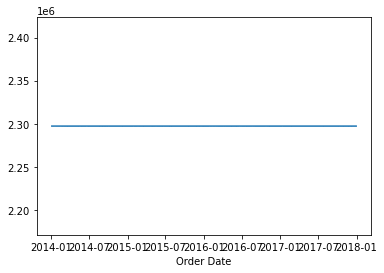

In [86]:
sns.lineplot(data = df, x = "Order Date", y = sum(df["Sales"]))
